# Обучение многослойной сети

In [5]:
from tensorflow import keras
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
import numpy as np


def load_train(path):
    features_train = np.load(path + 'train_features.npy')
    target_train = np.load(path + 'train_target.npy')
    features_train = np.reshape(features_train, (features_train.shape[0], 28 * 28))
    features_train = features_train/255
    return features_train, target_train


def create_model(input_shape):
    model = Sequential()
    model.add(Dense(units=30, input_shape=input_shape, activation='relu'))
    model.add(Dense(units=15, input_dim=(30), activation='relu'))
    model.add(Dense(units=10, input_dim=(15), activation='softmax'))
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    return model


def train_model(model, train_data, test_data, batch_size=32, epochs=10,
               steps_per_epoch=None, validation_steps=None):

    features_train, target_train = train_data
    features_test, target_test = test_data
    model.fit(features_train, target_train, 
              validation_data=(features_test, target_test),
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model 

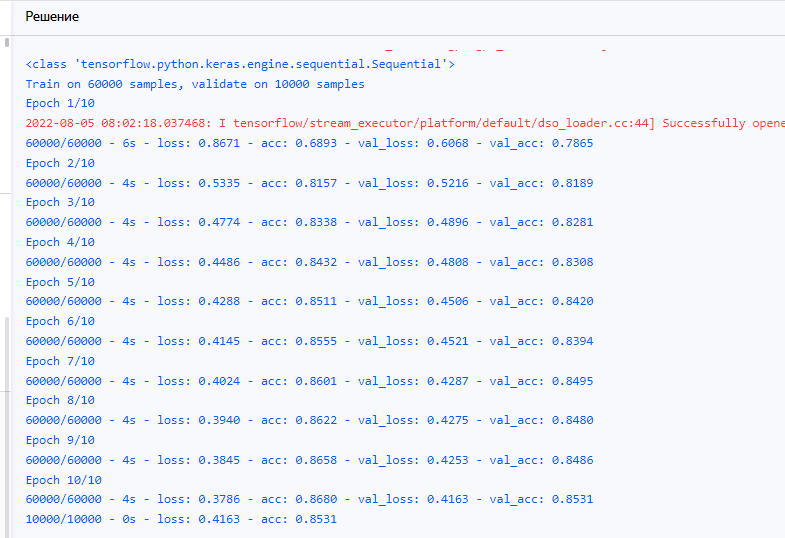